# Cognitive Science : Assignment-1
## Q3 : Rulkov Map
### Importing Basic Libs

In [316]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as clr
%matplotlib inline

### Defining f function

In [317]:
## defining the function f(x,y)
def getf(x,y, alpha = 6.0):
    '''
    X : Nx1
    Y : Nx1
    alpha : scalar
    '''
    
    v1 = (alpha/(1-x))+y
    v2 = (alpha + y)
    v3 = v2*0 - 1
    
    var1 = 1*(np.less_equal(x,0))
    var2 = (1*(np.less(x,v2)))*(1*(np.greater(x,0))) 
    var3 = 1*(np.greater_equal(x,v2))
    
    
    return v1*var1 + v2*var2 + v3*var3

#### Visualizing the f function

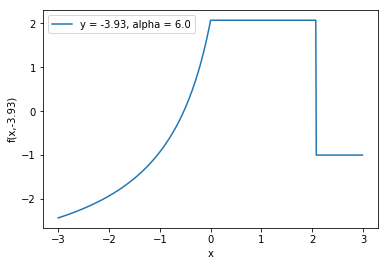

In [318]:
## Lets Visualize The function for fixed y
X = np.arange(-3,3,0.01)
y_con = -3.93
alpha = 6.0
Y = y_con + X*0
Fv = getf(x = X, y = Y, alpha = alpha)
plt.plot(X,Fv, label = 'y = '+str(y_con) + ", alpha = " + str(alpha))
plt.xlabel("x")
plt.ylabel("f(x,-3.93)")
plt.legend()
plt.savefig("13.png")
plt.show()

### Defining Rulkov Mapper

In [319]:
### defining the mapper

class rulkov_mapper:
    
    def __init__(self, mu= 0.001, beta = -3.93):
        self.mu = mu
        self.beta = beta
        
    
    def run(self,x0, y0, sigma = -0.01, alpha = 4 ,num_iter = 100):
        
        xs =[x0]
        ys =[y0]
        
        xn = x0
        yn = y0+self.beta
        for i in range(num_iter):
            
            var = getf(x = np.array([[xn]]), y = np.array([[yn]]), alpha = alpha)
            yn = yn - self.mu*(xn+1) + self.mu*sigma
            xn = var
            
            xs.append(xn)
            ys.append(yn)
            
        return (xs, ys)

In [320]:
mapper = rulkov_mapper()

### Visualizing the burst silence and tonic spiking

-0.8250673975347078


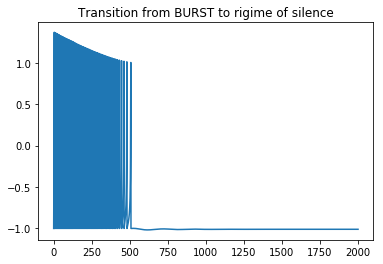

In [326]:
# Transition

xs, ys = mapper.run(-1,1.3,num_iter = 2000)
print(np.mean(xs))
plt.plot(xs)
plt.title('Transition from BURST to rigime of silence')
plt.savefig("14.png")
plt.show()

-0.9926242971157002


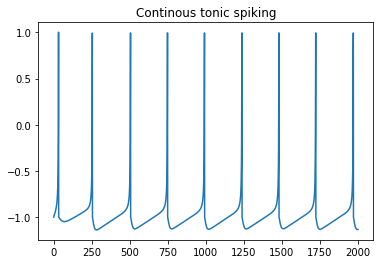

In [327]:
# Continous tonic spiking

xs, ys = mapper.run(-1,0.935,num_iter = 2000, sigma = 0.001)
print(np.mean(xs))
plt.plot(xs)
plt.title('Continous tonic spiking')
plt.savefig("15.png")
plt.show()

-0.8988029408338762


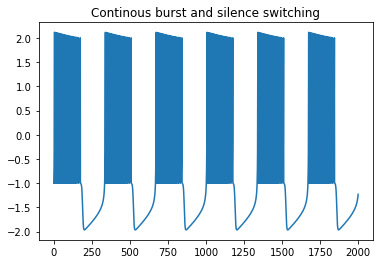

In [328]:
# Continous burst and silence switching

xs, ys = mapper.run(-1,0.05,num_iter = 2000, sigma = 0.1, alpha = 6.0)
print(np.mean(xs))
plt.plot(xs)
plt.title('Continous burst and silence switching')
plt.savefig("16.png")
plt.show()

## Empirical Analyis for parameter values

Note the limiting values have been obtained experimentally on mutilple runs manually

This may take some time..... have a cup of tea

In [329]:
z = []
labels = {
    'burst' : -1,
    'tonic' : 0,
    'silence' : 1
}
alpha_range = np.arange(2,8,1)
sigma_range = np.arange(-1,1.1,0.1)

for alpha in alpha_range:
    for sigma in sigma_range:
        xs, ys = mapper.run(-1,0.9,num_iter = 3000, sigma = sigma, alpha = alpha)
        if(np.mean(xs) < -0.95):
            z.append(labels['silence'])
        elif(np.mean(xs) > -0.38):
            z.append(labels['burst'])
        else:
            z.append(labels['tonic'])

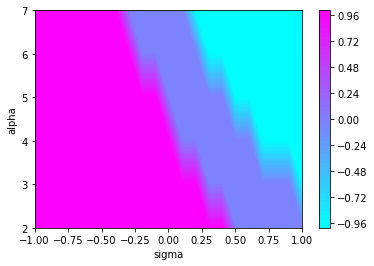

In [331]:
plt.contourf(sigma_range, alpha_range , np.array(z).reshape(alpha_range.shape[0], sigma_range.shape[0])
            , 50, cmap='cool')
plt.xlabel('sigma')
plt.ylabel('alpha')
plt.colorbar()
plt.savefig("17.png")
plt.show()

### Thankyou

Abhishek Kumar 

18111002